In [0]:
!pip install bayesian-optimization
!pip install pyproj

import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from pyproj import Proj,transform
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score   # AUC 스코어 계산
from sklearn.metrics import accuracy_score,log_loss,f1_score
from sklearn.model_selection import KFold,StratifiedKFold   # K-fold CV    
from sklearn.metrics import classification_report
from bayes_opt import BayesianOptimization  # 베이지안 최적화 라이브러리  
from functools import partial               # 함수 변수 고정
import lightgbm as lgb                      # LightGBM 라이브러리
import warnings       
warnings.filterwarnings("ignore")
import numpy as np
from imblearn.over_sampling import SMOTE

from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import math

from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import NearestNeighbors

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/final.csv')
data.head()

,Unnamed: 0,x,y,소로,중로2류,소로1류,소로3류,중로3류,소로2류,중로1류,광로2류,old_place,child_place,crosswork,building,bus,bohang,accident,old_acc,market,binary_accident,old/building,child/building,output_values,X좌표,Y좌표
0,0,195600.888993,545928.299315,6,0,0,1,0,0,0,0,0.0,1.0,5.0,93.0,45.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010753,-6.362207,126.950242,37.512821
1,1,194062.308207,544725.091085,19,0,0,1,0,0,0,0,1.0,3.0,4.0,219.0,2.0,0.0,2.0,1.0,0.0,1.0,0.004566,0.013699,-0.680369,126.932849,37.501972
2,2,197377.867009,543986.683138,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-10.379027,126.970348,37.495334
3,3,193058.182323,543489.087262,0,0,0,0,0,0,0,0,0.0,1.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,-9.319727,126.921505,37.490828
4,4,197347.383013,542701.828076,23,0,0,3,0,0,0,0,4.0,2.0,3.0,258.0,4.0,0.0,1.0,1.0,0.0,1.0,0.015504,0.007752,0.796933,126.970008,37.483757


In [0]:
#X_train=data[['소로', '소로1류', '소로3류','crosswork','bus','market','old/building']]
X_train=data[['소로', '중로2류', '소로1류', '소로3류', '중로3류', '소로2류','중로1류',
              '광로2류','crosswork','bus', 'bohang','market','old/building']]

In [0]:
y_data = data['binary_accident']

# PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
scaled_X = MinMaxScaler().fit_transform(X_train)

In [0]:
pca = PCA(n_components=2)
pca.fit(scaled_X)
pca_x = pca.transform(scaled_X)
pca_x.shape

(48312, 2)

In [0]:
pca_columns = ['pca_com1','pca_com2']
df_pca = pd.DataFrame(pca_x,columns=pca_columns)
df_pca['target'] = y_data
df_pca.head()

,pca_com1,pca_com2,target
0,0.294674,-0.192142,0.0
1,0.049663,0.178022,1.0
2,-0.245728,-0.040128,0.0
3,-0.221424,-0.057206,0.0
4,0.098953,0.257912,1.0


In [0]:
print(pca.explained_variance_ratio_)

[0.25114935 0.18099795]


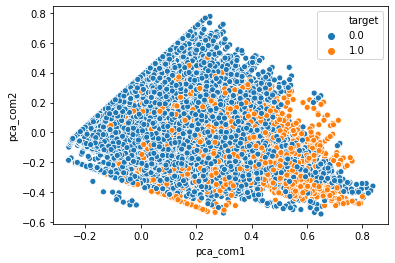

In [0]:
sns.scatterplot(df_pca['pca_com1'],df_pca['pca_com2'],hue='target',data=df_pca)

# TruncatedSVD

In [0]:
from sklearn.decomposition import TruncatedSVD

In [0]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(scaled_X)
df_tsvd = tsvd.transform(scaled_X)

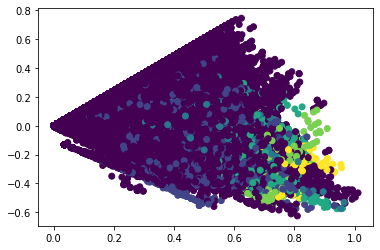

In [0]:
plt.scatter(df_tsvd[:,0],df_tsvd[:,1],c=data['old_acc'])

# clustering

## K-means

In [0]:
from sklearn.cluster import KMeans

In [0]:
scaled_X = MinMaxScaler().fit_transform(X_train)

In [0]:
scaled_X = pd.DataFrame(scaled_X,columns=X_train.columns)

In [0]:
scaled_X

,소로,중로2류,소로1류,소로3류,중로3류,소로2류,중로1류,광로2류,crosswork,bus,bohang,market,old/building
0,0.111111,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.185185,0.789474,0.0,0.0,0.000000
1,0.351852,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.148148,0.035088,0.0,0.0,0.009132
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.037037,0.000000,0.0,0.0,0.000000
4,0.425926,0.0,0.0,0.214286,0.0,0.0,0.0,0.0,0.111111,0.070175,0.0,0.0,0.031008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48307,0.185185,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.148148,0.070175,0.0,0.0,0.010811
48308,0.000000,1.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.222222,0.105263,0.0,0.0,0.111111
48309,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.148148,0.035088,0.0,0.0,0.000000
48310,0.388889,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


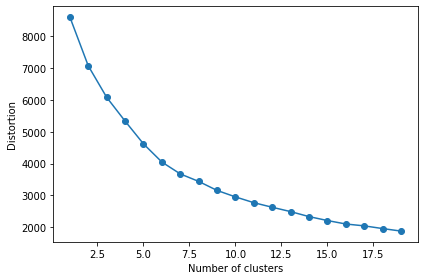

In [0]:
distortions = []
for i in range(1,20):
  km = KMeans(n_clusters=i,
              n_init=10,
              max_iter=1000,
              random_state=0)
  km.fit(scaled_X)
  distortions.append(km.inertia_)
plt.plot(range(1,20),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [0]:
kmeans = KMeans(n_clusters=6,max_iter=10000,)
cluster_labels = kmeans.fit_predict(scaled_X)

In [0]:
data['clusters'] = cluster_labels

In [0]:
data['clusters'].value_counts()

1    23285
2    11872
0     9354
4     2313
3      750
5      738
Name: clusters, dtype: int64

In [0]:
data.groupby('clusters')['binary_accident'].value_counts()

clusters  binary_accident
0         0.0                 8837
          1.0                  517
1         0.0                23089
          1.0                  196
2         0.0                 9924
          1.0                 1948
3         0.0                  539
          1.0                  211
4         0.0                 1187
          1.0                 1126
5         0.0                  644
          1.0                   94
Name: binary_accident, dtype: int64

In [0]:
data['clusters'].value_counts()

1    23285
2    11872
0     9354
4     2313
3      750
5      738
Name: clusters, dtype: int64

In [0]:
data.head()

,Unnamed: 0,x,y,소로,중로2류,소로1류,소로3류,중로3류,소로2류,중로1류,광로2류,old_place,child_place,crosswork,building,bus,bohang,accident,old_acc,market,binary_accident,old/building,child/building,output_values,X좌표,Y좌표,clusters
0,0,195600.888993,545928.299315,6,0,0,1,0,0,0,0,0.0,1.0,5.0,93.0,45.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010753,-6.362207,126.950242,37.512821,2
1,1,194062.308207,544725.091085,19,0,0,1,0,0,0,0,1.0,3.0,4.0,219.0,2.0,0.0,2.0,1.0,0.0,1.0,0.004566,0.013699,-0.680369,126.932849,37.501972,0
2,2,197377.867009,543986.683138,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-10.379027,126.970348,37.495334,1
3,3,193058.182323,543489.087262,0,0,0,0,0,0,0,0,0.0,1.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,-9.319727,126.921505,37.490828,1
4,4,197347.383013,542701.828076,23,0,0,3,0,0,0,0,4.0,2.0,3.0,258.0,4.0,0.0,1.0,1.0,0.0,1.0,0.015504,0.007752,0.796933,126.970008,37.483757,0


## DBSCAN

In [0]:
robust_scaler = RobustScaler()
scaled_X=robust_scaler.fit_transform(pd.DataFrame(X_train))

In [0]:
scan_model = DBSCAN(eps=0.9,min_samples= 100)
                                          # If you don't want the MinPts value to be 4, you can decide the MinPts = k+1.
clusters=scan_model.fit_predict(scaled_X)
print('클러스터 레이블:\n',clusters)

클러스터 레이블:
 [-1  0  1 ...  1  1  1]


In [0]:
pd.Series(clusters).value_counts().reset_index()

,index,0
0,1,25170
1,-1,11680
2,0,3869
3,2,2683
4,8,1184
5,3,693
6,12,431
7,11,426
8,4,357
9,5,352


In [0]:
data['clusters']=clusters
data.head()

,Unnamed: 0,x,y,소로,중로2류,소로1류,소로3류,중로3류,소로2류,중로1류,광로2류,old_place,child_place,crosswork,building,bus,bohang,accident,old_acc,market,binary_accident,old/building,child/building,output_values,X좌표,Y좌표,clusters
0,0,195600.888993,545928.299315,6,0,0,1,0,0,0,0,0.0,1.0,5.0,93.0,45.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010753,-6.362207,126.950242,37.512821,-1
1,1,194062.308207,544725.091085,19,0,0,1,0,0,0,0,1.0,3.0,4.0,219.0,2.0,0.0,2.0,1.0,0.0,1.0,0.004566,0.013699,-0.680369,126.932849,37.501972,0
2,2,197377.867009,543986.683138,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-10.379027,126.970348,37.495334,1
3,3,193058.182323,543489.087262,0,0,0,0,0,0,0,0,0.0,1.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,-9.319727,126.921505,37.490828,1
4,4,197347.383013,542701.828076,23,0,0,3,0,0,0,0,4.0,2.0,3.0,258.0,4.0,0.0,1.0,1.0,0.0,1.0,0.015504,0.007752,0.796933,126.970008,37.483757,8


In [0]:
data[data['binary_accident']==1]['clusters'].value_counts()

-1     2275
 1      564
 12     262
 0      229
 2      220
 4      128
 13     125
 3      102
 8       94
 10      49
 15      19
 11      12
 5        7
 9        6
Name: clusters, dtype: int64

In [0]:
data.to_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/final(eps=0.9,min_samples= 50).csv',index=False)

## 계층군집

In [0]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [0]:
scaled_X = MinMaxScaler().fit_transform(X_train)
scaled_X = pd.DataFrame(scaled_X,columns=X_train.columns)
y_data = data['binary_accident']

In [0]:
#df_cluster = pd.concat([scaled_X,y_data],axis=1)

In [0]:
clusters = linkage(scaled_X, method='complete', metric='euclidean') # df_cluster

In [0]:
clusters

array([[1.02690000e+04, 1.92580000e+04, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 7.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 1.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.65870000e+04, 9.66100000e+04, 1.72498432e+00, 1.48800000e+03],
       [9.66070000e+04, 9.66190000e+04, 1.83561594e+00, 4.68240000e+04],
       [9.66200000e+04, 9.66210000e+04, 2.01469226e+00, 4.83120000e+04]])

In [0]:
# import matplotlib.pyplot as plt
# plt.figure(figsize = (9331200, 3732480) )
# dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
# # leaf_rotation=90 : 글자 각도
# # leaf_font_size=20 : 글자 사이즈
# plt.show() 

In [0]:
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

In [0]:
cut_tree = fcluster(clusters, t=0.4, criterion='distance')
cut_tree # prediction

array([110, 203, 202, ..., 242, 203, 202], dtype=int32)

In [0]:
labels = data['binary_accident']

In [0]:
kk = pd.DataFrame({'pred':cut_tree, 'labels':labels})

In [0]:
kk

,pred,labels
0,110,0.0
1,203,1.0
2,202,0.0
3,202,0.0
4,187,1.0
...,...,...
48307,242,0.0
48308,4,0.0
48309,242,0.0
48310,203,0.0


In [0]:
data['clusters'] = kk['pred']
data.head()

,Unnamed: 0,x,y,소로,중로2류,소로1류,소로3류,중로3류,소로2류,중로1류,광로2류,old_place,child_place,crosswork,building,bus,bohang,accident,old_acc,market,binary_accident,old/building,child/building,output_values,X좌표,Y좌표,clusters
0,0,195600.888993,545928.299315,6,0,0,1,0,0,0,0,0.0,1.0,5.0,93.0,45.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010753,-6.362207,126.950242,37.512821,110
1,1,194062.308207,544725.091085,19,0,0,1,0,0,0,0,1.0,3.0,4.0,219.0,2.0,0.0,2.0,1.0,0.0,1.0,0.004566,0.013699,-0.680369,126.932849,37.501972,203
2,2,197377.867009,543986.683138,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-10.379027,126.970348,37.495334,202
3,3,193058.182323,543489.087262,0,0,0,0,0,0,0,0,0.0,1.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,-9.319727,126.921505,37.490828,202
4,4,197347.383013,542701.828076,23,0,0,3,0,0,0,0,4.0,2.0,3.0,258.0,4.0,0.0,1.0,1.0,0.0,1.0,0.015504,0.007752,0.796933,126.970008,37.483757,187


In [0]:
value_mean=data.groupby('clusters')['output_values'].mean().reset_index()

In [0]:
for c in data['clusters'].unique():
  data.loc[data['clusters']==c,'value_mean'] = value_mean[value_mean['clusters']==c]['output_values'].values[0]

In [0]:
cluster_final=data[data['value_mean']>0]

# 시각화

In [0]:
old_accident = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/old_accident.csv',encoding='cp949')
old = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/노인보호구역.csv',encoding='cp949')

In [0]:
cluster_final.groupby('clusters')['value_mean'].max().sort_values(ascending=False).reset_index().head()

,clusters,value_mean
0,45,6.682417
1,37,6.437230
2,46,6.306652
3,52,5.904876
4,54,5.878751


rank 맞춰주자

In [0]:
cluster_final.loc[(cluster_final['value_mean']>0)&(cluster_final['value_mean']<1),'rank']=7
cluster_final.loc[(cluster_final['value_mean']>=1)&(cluster_final['value_mean']<2),'rank']=6
cluster_final.loc[(cluster_final['value_mean']>=2)&(cluster_final['value_mean']<3),'rank']=5
cluster_final.loc[(cluster_final['value_mean']>=3)&(cluster_final['value_mean']<4),'rank']=4
cluster_final.loc[(cluster_final['value_mean']>=4)&(cluster_final['value_mean']<5),'rank']=3
cluster_final.loc[(cluster_final['value_mean']>=5)&(cluster_final['value_mean']<6),'rank']=2
cluster_final.loc[(cluster_final['value_mean']>=6)&(cluster_final['value_mean']<7),'rank']=1

In [0]:
cluster1 = map_cluster['rank'].value_counts()
print(len(cluster1))
print(cluster1)
ls = list(cluster1.index)

7
6.0    449
5.0    437
7.0    415
3.0    407
4.0    272
2.0    228
1.0     72
Name: rank, dtype: int64


In [0]:
ls

[2.0, 3.0, 1.0, 5.0, 4.0, 6.0, 7.0]

In [0]:
# (5) 동작구 경계지도 read - .json 파일
import folium
from folium.plugins import FastMarkerCluster

import json
with open('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/dongjak_municipalities_geo.json',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()
print('파일읽기 완료')

파일읽기 완료


In [0]:
color_data = ['#CC3D3D', '#CC723D', '#997000', '#FAED7D', '#47C83E', '#3DB7CC', '#4374D9', '#8041D9', '#D941C5', '#99004C']

In [0]:
# (7) data1 - cluster1 - 모든 좌표 색 동일

center = [map_cluster['Y좌표'].mean(), map_cluster['X좌표'].mean()]
tile_map = 'OpenStreetMap' 
map = folium.Map(location = center, tiles=tile_map, zoom_start=14)
# TILES OpenStreetMap / mapquestopen / MapQuest Open Aerial / Mapbox Bright
# TILES stamenterrain / stamenwatercolor / cartodbpositron

count = 0
remove_count = 0
for i in map_cluster.index:
    if map_cluster.loc[i, 'rank'] ==  ls[0]: # 
        icon_color = color_data[0]
    elif map_cluster.loc[i, 'rank'] == ls[1] : # 
        icon_color = color_data[1]
    elif map_cluster.loc[i, 'rank'] == ls[2]: # 
        icon_color = color_data[2]
    elif map_cluster.loc[i, 'rank'] == ls[3] : # 
        icon_color = color_data[3]
    elif map_cluster.loc[i, 'rank'] == ls[4] : # 
        icon_color = color_data[4]
    elif map_cluster.loc[i, 'rank'] == ls[5] : #
        icon_color = color_data[5]
    elif map_cluster.loc[i, 'rank'] == ls[6] : # 
        icon_color = color_data[6]   
    elif map_cluster.loc[i, 'rank'] == ls[7] : #
        icon_color = color_data[7] 
    elif map_cluster.loc[i, 'rank'] == ls[8] : # 
        icon_color = color_data[8]
    elif map_cluster.loc[i, 'rank'] == ls[9] : # 
        icon_color = color_data[9] 

    else:
        icon_color = '#000000'
        remove_count+=1
    #if icon_color != '#000000':
    folium.CircleMarker(
        location = [map_cluster.loc[i,'Y좌표'], map_cluster.loc[i,'X좌표']],
        radius = 3, # 원의 크기 (2가 마지노선)
        color=icon_color, # 테두리색
    ).add_to(map)

# 노인 보호구역
for i in old.index:
    folium.CircleMarker(
        location = [old.loc[i,'위도'], old.loc[i,'경도']],
        radius = 10,    
        color='#F3B15A'# 테두리색 - 노란색
    ).add_to(map)
    #print([old.loc[i,'경도'], old.loc[i,'위도']])
    
# 노인 교통사고
for i in old_accident.index:
    folium.CircleMarker(
        location = [old_accident.loc[i, '위도'], old_accident.loc[i, '경도']],
        radius = 15,
        color = '#FFFF00'
    ).add_to(map)


# 동작구 형태지도 출력
folium.GeoJson(
    geo,
    name='dongjak_municipalities',
).add_to(map)

#map.save('map_' + str(iteration) + '.html')
map

In [0]:
cluster_final.to_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/real_final.csv',encoding='cp949',index=False)

In [0]:
cluster_final['clusters'].unique()

array([ 99,  60,  29,  52,  91,  84,  68, 250,  14,  41, 226,   3,  50,
        65,  81,  45,  80,  66, 144,  44,  64,  79,  88,  48, 176,  54,
       135,  73,  46, 122, 101,  40, 100,  53, 139,  38,  15,  17, 136,
        51,  56,  25,   1,  28, 138,  42,  49, 206,  47, 130,  39, 142,
        93,  37,  27, 141, 137, 134,  55], dtype=int32)